<a href="https://colab.research.google.com/github/Jose4200/Parcial-1-IA/blob/main/Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 0. Instalaciones
!pip install -q pandas numpy scikit-learn xgboost matplotlib seaborn datasets

# 1. Importaciones necesarias
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from IPython.display import display

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score,
                          silhouette_score, classification_report)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support


# 2. Carga de datos
!pip install -q pyreadr

import pyreadr
import pandas as pd

ruta = "/content/Parte_A.Rds"
res = pyreadr.read_r(ruta)

obj = next(iter(res.values()))
print("Tipo del objeto cargado:", type(obj))

df = obj if isinstance(obj, pd.DataFrame) else pd.DataFrame(obj)
print(df.dtypes)
for b in ["is_returning_user", "sign_up"]:
    df[b] = df[b].fillna(0).astype(int)
for c in ["device_type", "os_type"]:
    df[c] = df[c].astype("category")

print(df.shape)
print(df.columns.tolist())
print("\nTipos tras limpieza:\n", df.dtypes)
print(df.head())


Tipo del objeto cargado: <class 'pandas.core.frame.DataFrame'>
time_spent            float64
past_sessions           int32
device_type          category
os_type              category
is_returning_user     float64
sign_up                 int32
Revenue               float64
dtype: object
(100000, 7)
['time_spent', 'past_sessions', 'device_type', 'os_type', 'is_returning_user', 'sign_up', 'Revenue']

Tipos tras limpieza:
 time_spent            float64
past_sessions           int32
device_type          category
os_type              category
is_returning_user       int64
sign_up                 int64
Revenue               float64
dtype: object
   time_spent  past_sessions device_type  os_type  is_returning_user  sign_up  \
0    2.326202              4     desktop    other                  1        1   
1    5.193170              3     desktop      osx                  1        1   
2    2.802845              2      mobile    other                  1        1   
3    0.042522              3 

LinReg | R2: 0.2670 | MAE: 1.5669 | RMSE: 2.3462
KNNReg | R2: 0.6122 | MAE: 1.1484 | RMSE: 1.7066
XGBReg | R2: 0.6342 | MAE: 1.1158 | RMSE: 1.6574

Mejor modelo (según RMSE): XGBReg

Ablaciones usando el modelo ganador: XGBReg
           baseline_full | R2: 0.6342 | MAE: 1.1158 | RMSE: 1.6574
           no_time_spent | R2: 0.1350 | MAE: 1.7550 | RMSE: 2.5486
        no_past_sessions | R2: 0.3160 | MAE: 1.4716 | RMSE: 2.2663
              early_only | R2: 0.1350 | MAE: 1.7550 | RMSE: 2.5486
            minimal_core | R2: 0.3938 | MAE: 1.4914 | RMSE: 2.1336
         just_time_spent | R2: 0.2866 | MAE: 1.5029 | RMSE: 2.3146
      just_past_sessions | R2: 0.1059 | MAE: 1.7777 | RMSE: 2.5913
            no_device_os | R2: 0.5773 | MAE: 1.1753 | RMSE: 1.7816

Resumen de ablaciones (modelo ganador):


/tmp/ipython-input-2861724074.py:144: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  base_rmse = float(abl_df.loc[abl_df["setup"] == "baseline_full", "rmse"])


,setup,r2,mae,rmse,k_feats,delta_rmse_vs_baseline
0,baseline_full,0.634225,1.115761,1.657360,5,0.000000
1,no_device_os,0.577341,1.175257,1.781578,3,0.124219
2,minimal_core,0.393825,1.491436,2.133580,2,0.476220
3,no_past_sessions,0.316043,1.471639,2.266336,4,0.608976
4,just_time_spent,0.286595,1.502942,2.314611,1,0.657252
5,no_time_spent,0.135045,1.754989,2.548629,4,0.891269
6,early_only,0.135045,1.754989,2.548629,4,0.891269
7,just_past_sessions,0.105859,1.777701,2.591272,1,0.933912


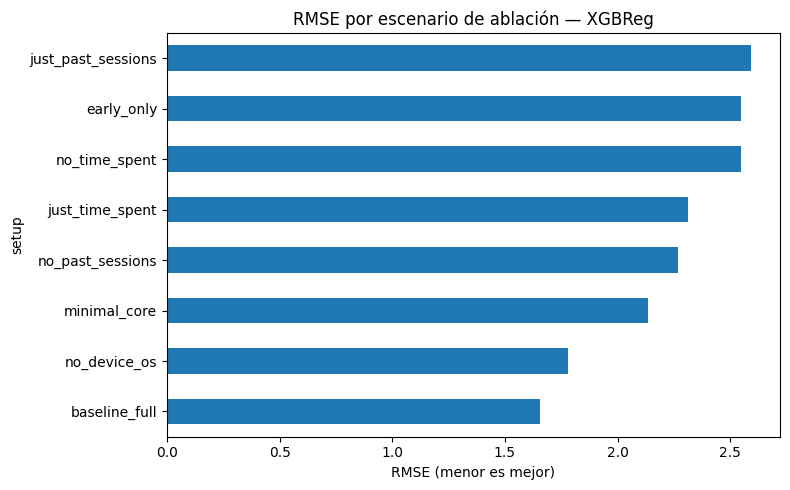


Solo registrados → R2: 0.6287 | MAE: 1.1687 | RMSE: 1.7658

Top features por importancia:


,feature,importance
0,past_sessions,0.343924
1,time_spent,0.247792
2,os_type_osx,0.170805
3,device_type_mobile,0.077329
4,device_type_desktop,0.055769
5,is_returning_user,0.040451
6,os_type_windows,0.034132
7,os_type_other,0.018085
8,device_type_tablet,0.011713


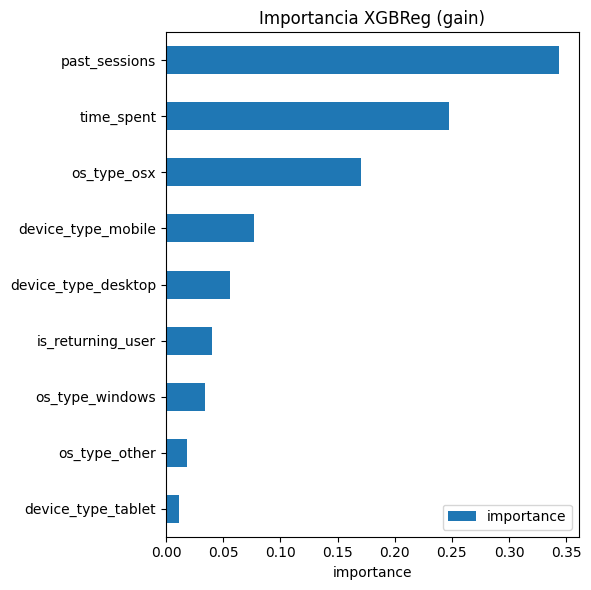

In [ ]:
# --- 3) Predicción de Revenue ---


# Función RMSE compatible con cualquier versión de sklearn
def rmse(y_true, y_pred):
    try:
        return mean_squared_error(y_true, y_pred, squared=False)
    except TypeError:
        return np.sqrt(mean_squared_error(y_true, y_pred))

# a) Definir features
num_cols = ["time_spent", "past_sessions"]
cat_cols = ["device_type", "os_type"]
bin_cols = ["is_returning_user"]
feat_cols = num_cols + cat_cols + bin_cols

Xr = df[feat_cols].copy()
yr = df["Revenue"].copy()

pre_reg = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("bin", "passthrough", bin_cols),
    ]
)

# Modelos a evaluar
reg_models = {
    "LinReg": LinearRegression(),
    "KNNReg": KNeighborsRegressor(n_neighbors=15),
    "XGBReg": xgb.XGBRegressor(
        n_estimators=500,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        learning_rate=0.05,
        random_state=42,
        n_jobs=-1,
        reg_lambda=1.0,
    ),
}

# Train / test split
Xtr, Xte, ytr, yte = train_test_split(Xr, yr, test_size=0.2, random_state=42)

def evaluar(pipe, Xte, yte, nombre):
    pred = pipe.predict(Xte)
    print(
        f"{nombre:>6} | R2: {r2_score(yte, pred):.4f} | "
        f"MAE: {mean_absolute_error(yte, pred):.4f} | "
        f"RMSE: {rmse(yte, pred):.4f}"
    )
    return {"name": nombre, "rmse": rmse(yte, pred)}

# Entrenar y evaluar
res = []
for name, model in reg_models.items():
    pipe = Pipeline([("pre", pre_reg), ("model", model)])
    pipe.fit(Xtr, ytr)
    res.append(evaluar(pipe, Xte, yte, name))

# Elegir el mejor por RMSE
best_name = sorted(res, key=lambda d: d["rmse"])[0]["name"]
best_model = reg_models[best_name]

pipe_best_reg = Pipeline([("pre", pre_reg), ("model", best_model)])
pipe_best_reg.fit(Xtr, ytr)
print("\nMejor modelo (según RMSE):", best_name)


# --- helpers para construir el preprocesador según columnas escogidas ---
def make_preprocessor(selected_cols):
    num = [c for c in ["time_spent", "past_sessions"] if c in selected_cols]
    cat = [c for c in ["device_type", "os_type"] if c in selected_cols]
    bin_ = [c for c in ["is_returning_user"] if c in selected_cols]

    transformers = []
    if num:
        transformers.append(("num", StandardScaler(), num))
    if cat:
        transformers.append(("cat", OneHotEncoder(handle_unknown="ignore"), cat))
    if bin_:
        transformers.append(("bin", "passthrough", bin_))
    return ColumnTransformer(transformers)

def eval_subset(model, subset_name, selected_cols, verbose=True):
    pre = make_preprocessor(selected_cols)
    pipe = Pipeline([("pre", pre), ("model", model)])
    pipe.fit(Xtr[selected_cols], ytr)
    pred = pipe.predict(Xte[selected_cols])
    r2 = r2_score(yte, pred)
    mae_v = mean_absolute_error(yte, pred)
    rmse_v = rmse(yte, pred)
    if verbose:
        print(f"{subset_name:>24} | R2: {r2:.4f} | MAE: {mae_v:.4f} | RMSE: {rmse_v:.4f}")
    return {"setup": subset_name, "r2": r2, "mae": mae_v, "rmse": rmse_v, "k_feats": len(selected_cols)}

# --- escenarios de ablación ---
ablations = {
    "baseline_full": feat_cols,  # todas
    "no_time_spent": [c for c in feat_cols if c != "time_spent"],
    "no_past_sessions": [c for c in feat_cols if c != "past_sessions"],
    "early_only": ["past_sessions", "device_type", "os_type", "is_returning_user"],  # sin time_spent
    "minimal_core": ["time_spent", "past_sessions"],  # núcleo mínimo recomendado
    "just_time_spent": ["time_spent"],
    "just_past_sessions": ["past_sessions"],
    "no_device_os": [c for c in feat_cols if c not in ["device_type", "os_type"]],
}

# --- correr ablaciones para el modelo GANADOR ---
print("\nAblaciones usando el modelo ganador:", best_name)
abl_results = []
for setup, cols in ablations.items():
    abl_results.append(eval_subset(reg_models[best_name], setup, cols))

abl_df = pd.DataFrame(abl_results)

# calcular baseline del ganador para ΔRMSE
base_rmse = float(abl_df.loc[abl_df["setup"] == "baseline_full", "rmse"])
abl_df["delta_rmse_vs_baseline"] = abl_df["rmse"] - base_rmse
abl_df = abl_df.sort_values("rmse").reset_index(drop=True)

print("\nResumen de ablaciones (modelo ganador):")
display(abl_df)

# gráfico rápido
plt.figure(figsize=(8,5))
(abl_df.set_index("setup")["rmse"].sort_values()
      .plot(kind="barh"))
plt.title(f"RMSE por escenario de ablación — {best_name}")
plt.xlabel("RMSE (menor es mejor)")
plt.tight_layout()
plt.show()

# --- OPCIONAL: correr las mismas ablaciones para los TRES modelos ---
run_for_all_models = False  # pon True si quieres comparar Lineal vs KNN vs XGB en cada ablación
if run_for_all_models:
    all_rows = []
    for model_name, model in reg_models.items():
        print(f"\nAblaciones para modelo: {model_name}")
        tmp = []
        for setup, cols in ablations.items():
            out = eval_subset(model, setup, cols, verbose=False)
            out["model"] = model_name
            out["setup"] = setup
            out["k_feats"] = len(cols)
            tmp.append(out)
        tmp_df = pd.DataFrame(tmp)
        base_rmse_m = float(tmp_df.loc[tmp_df["setup"] == "baseline_full", "rmse"])
        tmp_df["delta_rmse_vs_baseline"] = tmp_df["rmse"] - base_rmse_m
        all_rows.append(tmp_df)
        # listado ordenado
        print(tmp_df.sort_values(["rmse"]).to_string(index=False))
    all_abl_df = pd.concat(all_rows, ignore_index=True)
    print("\nTabla combinada (todos los modelos, todas las ablaciones):")
    display(all_abl_df.sort_values(["setup", "rmse"]).reset_index(drop=True))

# --------- Solo usuarios que se registran ----------
df_buyers = df[df["sign_up"] == 1].copy()

if df_buyers.empty:
    print("\nSolo registrados → no hay filas con sign_up == 1; se omite evaluación.")
else:
    Xr_b = df_buyers[feat_cols]
    yr_b = df_buyers["Revenue"]
    Xtr_b, Xte_b, ytr_b, yte_b = train_test_split(Xr_b, yr_b, test_size=0.2, random_state=42)

    pipe_xgb_b = Pipeline([("pre", pre_reg), ("model", reg_models["XGBReg"])])
    pipe_xgb_b.fit(Xtr_b, ytr_b)
    pred_b = pipe_xgb_b.predict(Xte_b)
    print(
        f"\nSolo registrados → R2: {r2_score(yte_b, pred_b):.4f} | "
        f"MAE: {mean_absolute_error(yte_b, pred_b):.4f} | "
        f"RMSE: {rmse(yte_b, pred_b):.4f}"
    )

# === Importancias de variables (XGBReg)
# 1) Definir features (reutilizamos las mismas listas)
# 2) Pipeline XGBReg
xgb_reg = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1,
    reg_lambda=1.0,
)

pipe_imp = Pipeline([("pre", pre_reg), ("model", xgb_reg)])
pipe_imp.fit(df[feat_cols], df["Revenue"])

# 3) Nombres finales después del One-Hot
ohe = pipe_imp.named_steps["pre"].named_transformers_["cat"]
try:
    cat_names = ohe.get_feature_names_out(["device_type", "os_type"])
except AttributeError:
    # Compatibilidad con versiones viejas de sklearn
    cat_names = ohe.get_feature_names(["device_type", "os_type"])

feature_names = list(num_cols) + list(cat_names) + list(bin_cols)

# 4) Importancias y gráfico
imp = pipe_imp.named_steps["model"].feature_importances_
fi = (
    pd.DataFrame({"feature": feature_names, "importance": imp})
    .sort_values("importance", ascending=False)
    .reset_index(drop=True)
)

print("\nTop features por importancia:")
display(fi.head(15))

# Gráfico (las top 15 en orden ascendente para una barra horizontal clara)
fi.head(15).iloc[::-1].plot(kind="barh", x="feature", y="importance", figsize=(6, 6))
plt.title("Importancia XGBReg (gain)")
plt.xlabel("importance")
plt.ylabel("")
plt.tight_layout()
plt.show()


LogReg  AUC: 0.5005
              precision    recall  f1-score   support

           0       0.51      0.52      0.51      1009
           1       0.50      0.49      0.49       991

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000

KNN  AUC: 0.5191
              precision    recall  f1-score   support

           0       0.53      0.54      0.53      1009
           1       0.52      0.50      0.51       991

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000

XGB  AUC: 0.5111
              precision    recall  f1-score   support

           0       0.51      0.53      0.52      1009
           1       0.50      0.49      0.50       991

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0

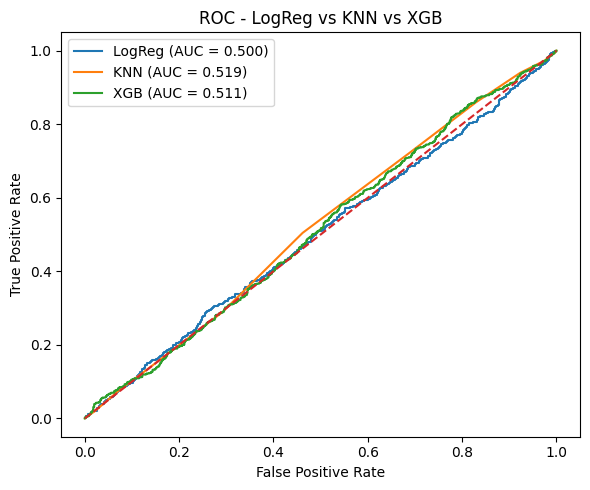

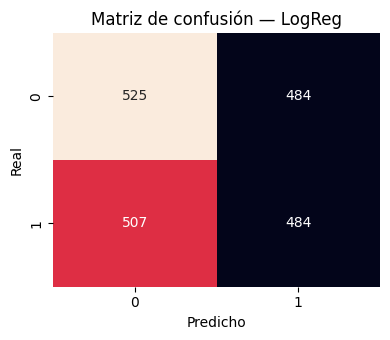

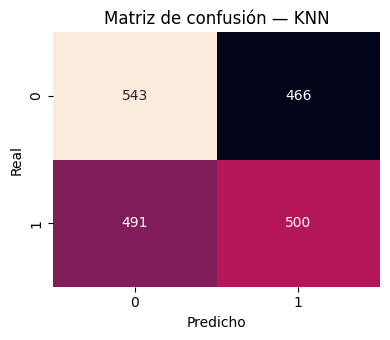

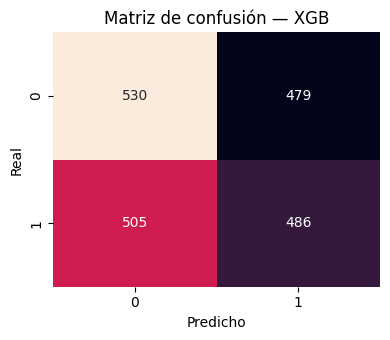

In [ ]:
# === ROC + AUC + Matrices de confusión (LogReg, KNN, XGB) ===

# 1) Columnas / datos
num_cols = ["time_spent", "past_sessions"]
cat_cols = ["device_type", "os_type"]
bin_cols = ["is_returning_user"]
feat_cols = num_cols + cat_cols + bin_cols

X = df[feat_cols].copy()
y = df["sign_up"].copy()

# 2) Preprocesamiento
pre_cls = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("bin", "passthrough", bin_cols),
])

# 3) Modelos
models = {
    "LogReg": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "KNN": KNeighborsClassifier(n_neighbors=15),
    "XGB": xgb.XGBClassifier(
        n_estimators=300, max_depth=5, subsample=0.9, colsample_bytree=0.9,
        learning_rate=0.05, eval_metric="logloss", n_jobs=-1, random_state=42
    ),
}

# 4) Holdout
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 5) Entrenar, AUC y guardar cosas para graficar
roc_data = {}   # name -> (fpr, tpr, auc)
preds = {}      # name -> (y_pred, y_prob)
for name, mdl in models.items():
    pipe = Pipeline([("pre", pre_cls), ("model", mdl)])
    pipe.fit(Xtr, ytr)
    prob = pipe.predict_proba(Xte)[:, 1]
    yhat = (prob >= 0.5).astype(int)
    fpr, tpr, _ = roc_curve(yte, prob)
    auc = roc_auc_score(yte, prob)
    roc_data[name] = (fpr, tpr, auc)
    preds[name] = (yhat, prob)
    print(f"{name}  AUC: {auc:.4f}")
    print(classification_report(yte, yhat))

# 6) Gráfico ROC conjunto
plt.figure(figsize=(6,5))
for name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - LogReg vs KNN vs XGB")
plt.legend()
plt.tight_layout()
plt.show()

# 7) Matrices de confusión (umbral 0.5)
for name, (yhat, prob) in preds.items():
    cm = confusion_matrix(yte, yhat)
    plt.figure(figsize=(4,3.5))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.title(f"Matriz de confusión — {name}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()


In [ ]:
# Buscar mejor umbral por F1 y por YoudenJ para cada modelo y mostrar matrices

def best_thresh(y_true, y_prob, criterion="f1"):
    ths = np.linspace(0,1,201)
    best_t, best_v = 0.5, -1
    for t in ths:
        yhat = (y_prob >= t).astype(int)
        prec, rec, f1, _ = precision_recall_fscore_support(y_true, yhat, average="binary", zero_division=0)
        spec = confusion_matrix(y_true, yhat).ravel()
        if len(spec)==4:
            tn, fp, fn, tp = spec
            tnr = tn/(tn+fp) if (tn+fp)>0 else 0
        else:
            tnr = 0
        val = f1 if criterion=="f1" else (rec + tnr - 1)  # YoudenJ
        if val > best_v:
            best_v, best_t = val, t
    return best_t, best_v

for name, (yhat0, prob) in preds.items():  # 'preds' viene de tu celda ROC
    t_f1, v_f1 = best_thresh(yte, prob, "f1")
    t_j , v_j  = best_thresh(yte, prob, "j")
    for crit, t in [("F1", t_f1), ("YoudenJ", t_j)]:
        yhat = (prob >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(yte, yhat).ravel()
        prec = tp/(tp+fp) if (tp+fp)>0 else 0
        rec  = tp/(tp+fn) if (tp+fn)>0 else 0
        tnr  = tn/(tn+fp) if (tn+fp)>0 else 0
        f1   = 2*prec*rec/(prec+rec) if (prec+rec)>0 else 0
        print(f"\n{name} @ {crit} (thr={t:.3f}) → TN:{tn} FP:{fp} FN:{fn} TP:{tp} | "
              f"Prec:{prec:.3f} Rec:{rec:.3f} Spec:{tnr:.3f} F1:{f1:.3f}")



LogReg @ F1 (thr=0.460) → TN:1 FP:1008 FN:0 TP:991 | Prec:0.496 Rec:1.000 Spec:0.001 F1:0.663

LogReg @ YoudenJ (thr=0.515) → TN:867 FP:142 FN:836 TP:155 | Prec:0.522 Rec:0.156 Spec:0.859 F1:0.241

KNN @ F1 (thr=0.000) → TN:0 FP:1009 FN:0 TP:991 | Prec:0.495 Rec:1.000 Spec:0.000 F1:0.663

KNN @ YoudenJ (thr=0.470) → TN:543 FP:466 FN:491 TP:500 | Prec:0.518 Rec:0.505 Spec:0.538 F1:0.511

XGB @ F1 (thr=0.000) → TN:0 FP:1009 FN:0 TP:991 | Prec:0.495 Rec:1.000 Spec:0.000 F1:0.663

XGB @ YoudenJ (thr=0.430) → TN:215 FP:794 FN:171 TP:820 | Prec:0.508 Rec:0.827 Spec:0.213 F1:0.630


In [ ]:
# Usa los probs ya guardados en 'preds' y el y real 'yte'

thr = 0.495  # pon 0.495 (LogReg balance) o 0.775 (XGB alta especificidad)
name = "XGB"
prob = preds[name][1]
yhat = (prob >= thr).astype(int)

print(name, "umbral", thr)
print(confusion_matrix(yte, yhat))
print(classification_report(yte, yhat, digits=3))


XGB umbral 0.495
[[504 505]
 [481 510]]
              precision    recall  f1-score   support

           0      0.512     0.500     0.506      1009
           1      0.502     0.515     0.508       991

    accuracy                          0.507      2000
   macro avg      0.507     0.507     0.507      2000
weighted avg      0.507     0.507     0.507      2000



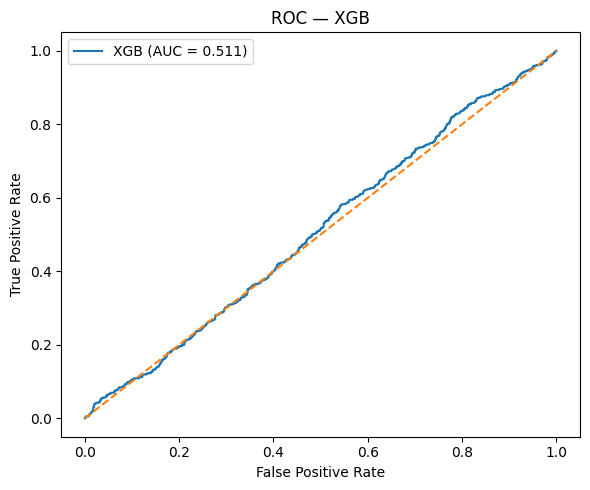

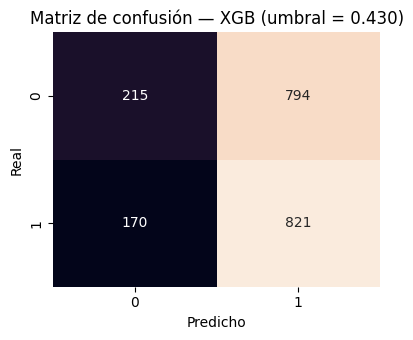

Umbral óptimo (Youden J): 0.430 | AUC: 0.511
              precision    recall  f1-score   support

           0      0.558     0.213     0.308      1009
           1      0.508     0.828     0.630       991

    accuracy                          0.518      2000
   macro avg      0.533     0.521     0.469      2000
weighted avg      0.534     0.518     0.468      2000



In [ ]:
# === XGB: ROC (AUC) + Matriz de confusión con umbral óptimo (Youden J) ===

# 1) Columnas
num_cols = ["time_spent", "past_sessions"]
cat_cols = ["device_type", "os_type"]
bin_cols = ["is_returning_user"]
feat_cols = num_cols + cat_cols + bin_cols

X = df[feat_cols].copy()
y = df["sign_up"].copy()

# 2) Preprocesamiento y modelo
pre = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("bin", "passthrough", bin_cols),
])

xgb_cls = xgb.XGBClassifier(
    n_estimators=300, max_depth=5, subsample=0.9, colsample_bytree=0.9,
    learning_rate=0.05, eval_metric="logloss", n_jobs=-1, random_state=42
)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
pipe_xgb = Pipeline([("pre", pre), ("model", xgb_cls)])
pipe_xgb.fit(Xtr, ytr)

# 3) ROC + AUC
probs = pipe_xgb.predict_proba(Xte)[:, 1]
fpr, tpr, thr = roc_curve(yte, probs)
auc = roc_auc_score(yte, probs)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"XGB (AUC = {auc:.3f})")
plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC — XGB")
plt.legend(); plt.tight_layout(); plt.show()

# 4) Umbral óptimo (Youden J = TPR - FPR) y matriz de confusión
j_idx = np.argmax(tpr - fpr)
best_thr = thr[j_idx]
yhat = (probs >= best_thr).astype(int)
cm = confusion_matrix(yte, yhat)

plt.figure(figsize=(4,3.5))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title(f"Matriz de confusión — XGB (umbral = {best_thr:.3f})")
plt.xlabel("Predicho"); plt.ylabel("Real")
plt.tight_layout(); plt.show()

print(f"Umbral óptimo (Youden J): {best_thr:.3f} | AUC: {auc:.3f}")
print(classification_report(yte, yhat, digits=3))


AUC (RandomForest): 0.511


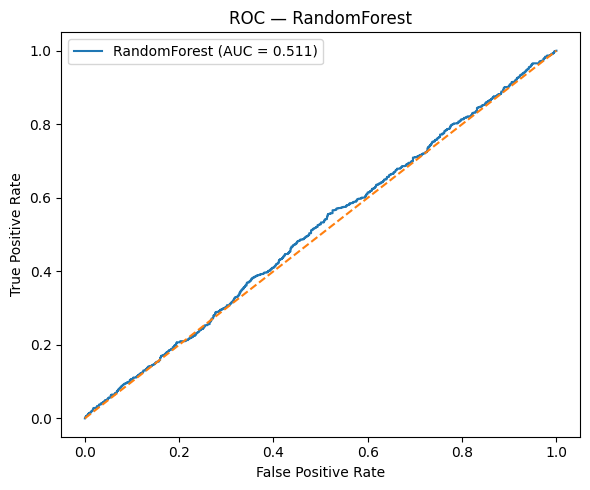

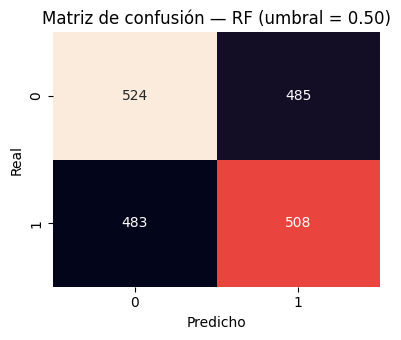

Reporte @0.5
               precision    recall  f1-score   support

           0      0.520     0.519     0.520      1009
           1      0.512     0.513     0.512       991

    accuracy                          0.516      2000
   macro avg      0.516     0.516     0.516      2000
weighted avg      0.516     0.516     0.516      2000



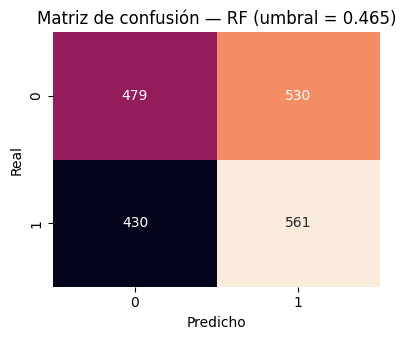

Reporte @YoudenJ (thr=0.465)
               precision    recall  f1-score   support

           0      0.527     0.475     0.499      1009
           1      0.514     0.566     0.539       991

    accuracy                          0.520      2000
   macro avg      0.521     0.520     0.519      2000
weighted avg      0.521     0.520     0.519      2000



In [ ]:
# === Random Forest: ROC (AUC) + Matrices de confusión ===


# 1) Columnas / datos
num_cols = ["time_spent", "past_sessions"]
cat_cols = ["device_type", "os_type"]
bin_cols = ["is_returning_user"]
feat_cols = num_cols + cat_cols + bin_cols

X = df[feat_cols].copy()
y = df["sign_up"].copy()

# 2) Preprocesamiento + modelo
pre = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("bin", "passthrough", bin_cols),
])
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_leaf=2,
    class_weight="balanced_subsample",
    n_jobs=-1,
    random_state=42
)
pipe_rf = Pipeline([("pre", pre), ("model", rf)])

# 3) Holdout
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
pipe_rf.fit(Xtr, ytr)

# 4) ROC + AUC
probs = pipe_rf.predict_proba(Xte)[:, 1]
fpr, tpr, thr = roc_curve(yte, probs)
auc = roc_auc_score(yte, probs)
print(f"AUC (RandomForest): {auc:.3f}")

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"RandomForest (AUC = {auc:.3f})")
plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC — RandomForest")
plt.legend(); plt.tight_layout(); plt.show()

# 5) Matriz de confusión @ 0.5
yhat05 = (probs >= 0.5).astype(int)
cm05 = confusion_matrix(yte, yhat05)
plt.figure(figsize=(4,3.5))
sns.heatmap(cm05, annot=True, fmt="d", cbar=False)
plt.title("Matriz de confusión — RF (umbral = 0.50)")
plt.xlabel("Predicho"); plt.ylabel("Real")
plt.tight_layout(); plt.show()
print("Reporte @0.5\n", classification_report(yte, yhat05, digits=3))

# 6) Matriz de confusión @ umbral óptimo (Youden J)
j_idx = np.argmax(tpr - fpr)
best_thr = thr[j_idx]
yhatJ = (probs >= best_thr).astype(int)
cmJ = confusion_matrix(yte, yhatJ)
plt.figure(figsize=(4,3.5))
sns.heatmap(cmJ, annot=True, fmt="d", cbar=False)
plt.title(f"Matriz de confusión — RF (umbral = {best_thr:.3f})")
plt.xlabel("Predicho"); plt.ylabel("Real")
plt.tight_layout(); plt.show()
print(f"Reporte @YoudenJ (thr={best_thr:.3f})\n", classification_report(yte, yhatJ, digits=3))
